In [1]:
# read the image
# using matplotlib
from matplotlib import image
from matplotlib import pyplot
import os
import numpy as np

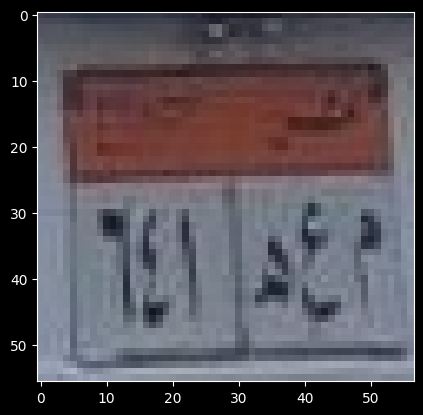

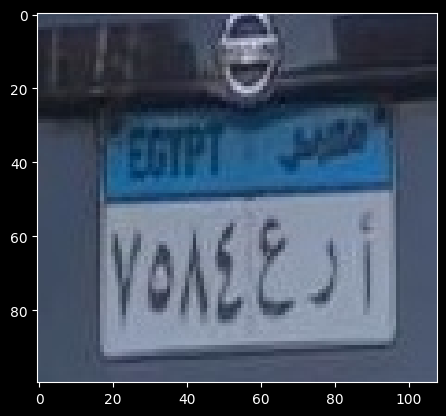

In [2]:
##read the croped images and predict the car model
cars = []
for filename in os.listdir('temp_plates'):
    file_path = os.path.join('temp_plates', filename)
    #print(file_path)
    # load image as pixel array
    data = image.imread(file_path)
    # plot image
    pyplot.imshow(data)
    pyplot.show()
    cars.append(data)
    #print(corped_cars)

In [3]:
! yolo task=detect \
mode=predict \
model=Recognizers/wolo.pt \
conf=0.25 \
source='temp_plates'

Ultralytics YOLOv8.0.96 🚀 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3904MiB)
YOLOv8n summary (fused): 168 layers, 3011303 parameters, 0 gradients, 8.1 GFLOPs

image 1/2 /run/media/ahmed/Hay/Egyptian cars plate recognizer/Egyptian cars plate recognizer/temp_plates/plate0.jpg: 608x608 1 1, 1 4, 1 6, 1 aain, 1 haa, 1 meem, 7.6ms
image 2/2 /run/media/ahmed/Hay/Egyptian cars plate recognizer/Egyptian cars plate recognizer/temp_plates/plate1.jpg: 576x608 1 4, 1 5, 1 7, 1 8, 1 aain, 1 alf, 1 raa, 59.4ms
Speed: 12.3ms preprocess, 33.5ms inference, 18.1ms postprocess per image at shape (1, 3, 608, 608)
Results saved to runs/detect/predict3


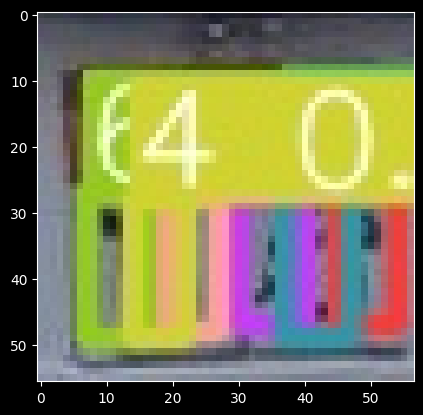

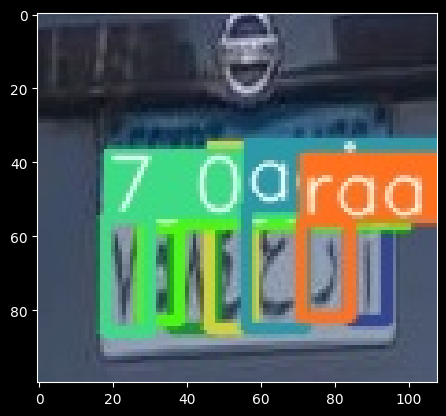

In [4]:
##read the croped images and predict the car model
pltes_pe = []
for filename in os.listdir('runs/detect/predict3'):
    file_path = os.path.join('runs/detect/predict3', filename)
    #print(file_path)
    # load image as pixel array
    data = image.imread(file_path)
    # plot image
    pyplot.imshow(data)
    pyplot.show()
    pltes_pe.append(data)
    #print(corped_cars)

In [5]:
# read polo wodel ==> car's plate reconizer using yolov8
from ultralytics import YOLO

wolo = YOLO("Recognizers/wolo.pt")

In [6]:
test = wolo(cars[0])



0: 608x608 1 1, 1 4, 1 6, 1 aain, 1 haa, 1 meem, 7.5ms
Speed: 4.6ms preprocess, 7.5ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 608)


In [7]:
# test

In [8]:
# get paltes from the car xywh
plates = []
all_paltes_info = []
for i in range(len(cars)):
    plate = wolo(cars[i])
    all_paltes_info.append(plate)
    # print(plate[0].boxes.xywh)
    plates.append(plate[0].boxes.xywh)




0: 608x608 1 1, 1 4, 1 6, 1 aain, 1 haa, 1 meem, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 608)

0: 576x608 1 4, 1 5, 1 7, 1 8, 1 aain, 1 alf, 1 raa, 55.3ms
Speed: 4.0ms preprocess, 55.3ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 608)


In [9]:
# plates

In [10]:
# remove empty plates with nelement() == 0
plates = [plate for plate in plates if plate.nelement() != 0]
# plates


In [11]:
# crop the cars from the image and add them to temp_plates folder

import cv2
import os

# Create target Directory if don't exist
if not os.path.exists('temp_plates2'):
    os.mkdir('temp_plates2')
    print("Directory " , 'temp_plates2' ,  " Created ")
else:
    print("Directory " , 'temp_plates2' ,  " already exists")
    # remove all files in temp folder
    for filename in os.listdir('temp_plates2'):
        file_path = os.path.join('temp_plates2', filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))


Directory  temp_plates2  Created 


In [12]:
len(plates)

2

In [13]:
pltes_has_chars = []
for i in range(len(plates)):
    pltes_has_chars.append(cars[i])

In [14]:
len(pltes_has_chars)

2

In [15]:
# plates

In [16]:
names = all_paltes_info[0][0].names
# names

In [17]:
# make array of plates classes
plates_classes = []
len_clss =[]
# make it's shape same as plates
for i in range(len(all_paltes_info)):
    plates_classes.append(all_paltes_info[i][0].boxes.cls)
    len_clss.append(len(all_paltes_info[i][0].boxes.cls))

# print(plates_classes)
# print(len_clss)


In [18]:
# map each class to it's box
plates_classes_mapped = dict()
plates_mapped_split = [] # to split the plates using len_clss
for i in range(len(plates_classes)):
    for j in range(len_clss[i]):
        key = int(all_paltes_info[i][0].boxes.cls[j])
        value = [float(x) for x in all_paltes_info[i][0].boxes.xywh[j]]
        plates_classes_mapped[key] = value
    plates_mapped_split.append(plates_classes_mapped)
    plates_classes_mapped = dict()

# plates_mapped_split

In [19]:
# sort the dict in each plate by key using value[0] ==> x
for i in range(len(plates_mapped_split)):
    plates_mapped_split[i] = dict(sorted(plates_mapped_split[i].items(), key=lambda item: item[1][0]))

# plates_mapped_split

In [20]:
print('Final Result')
# save sorted keys in list
plates_mapped_split_keys = []
for i in range(len(plates_mapped_split)):
    plates_mapped_split_keys.append(list(plates_mapped_split[i].keys()))

print(plates_mapped_split_keys)

# using names list to map the keys to the names
plates_mapped_split_names = []
for i in range(len(plates_mapped_split)):
    plates_mapped_split_names.append([names[x] for x in plates_mapped_split_keys[i]])

plates_mapped_split_names

Final Result
[[6, 4, 1, 17, 10, 20], [7, 5, 8, 4, 10, 22, 12]]


[['6', '4', '1', 'haa', 'aain', 'meem'],
 ['7', '5', '8', '4', 'aain', 'raa', 'alf']]

temp_plates2/0_0_[4].jpg


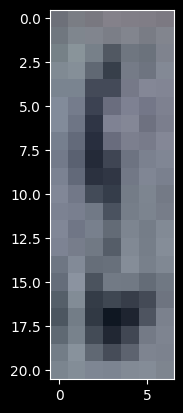

temp_plates2/0_1_[20].jpg


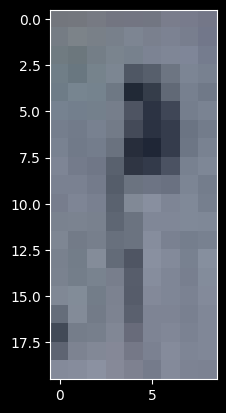

temp_plates2/0_2_[6].jpg


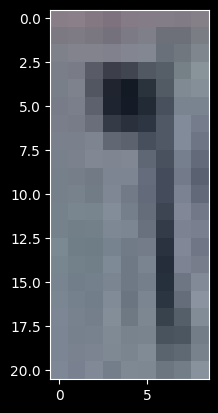

temp_plates2/0_3_[1].jpg


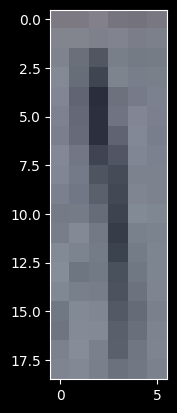

temp_plates2/0_4_[10].jpg


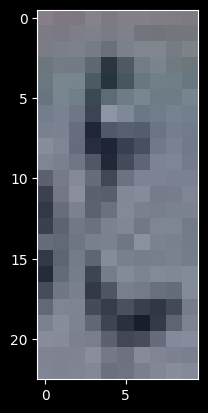

temp_plates2/0_5_[17].jpg


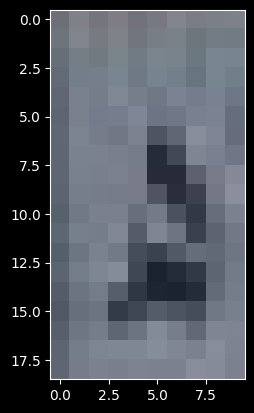

temp_plates2/1_0_[22].jpg


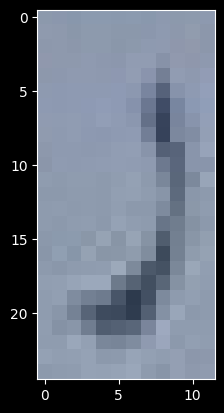

temp_plates2/1_1_[10].jpg


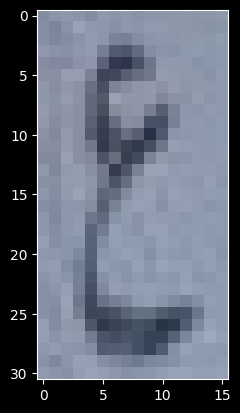

temp_plates2/1_2_[4].jpg


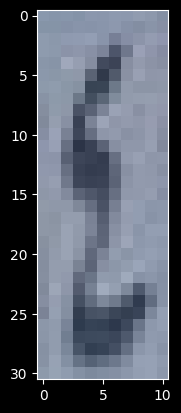

temp_plates2/1_3_[5].jpg


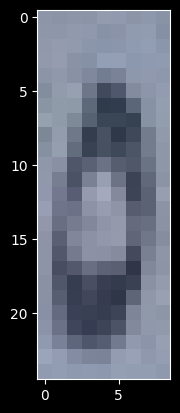

temp_plates2/1_4_[7].jpg


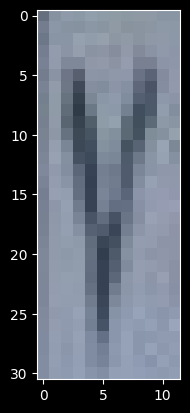

temp_plates2/1_5_[8].jpg


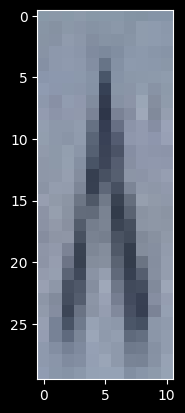

temp_plates2/1_6_[12].jpg


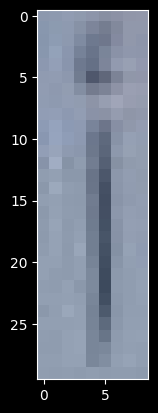

In [21]:
#crop_image_from_plates
for i in range(len(pltes_has_chars)):
    images_first_part_name = 'temp_plates2/' + str(i) + '_'
    m=0
    for x,y,w,h in plates[i]:
        images_first_part_name = 'temp_plates2/' + str(i) + '_'
        # print(x,y,w,h)
    # print(images_first_part_name)

         #x,y are the center of the box
        x_top_left= int(x - w/2)
        y_top_left= int(y - h/2)
        x_bottom_right= int(x + w/2)
        y_bottom_right= int(y + h/2)
        # crop the image
        crop_img = pltes_has_chars[i][y_top_left:y_bottom_right, x_top_left:x_bottom_right]
        # save the image
        # we will add the class name to the image name
        # we will get it using x ==> the first element in the list "value"
        real_x = float(x)
        # get the key of the x
        key_of_real_x = [key for key, value in plates_mapped_split[i].items() if value[0] == real_x]
        
        #the image name will "0_0_0.jpg" ==> "i_m_class.jpg"

        # full_path = str(images_first_part_name) + str(m) + '.jpg'
        full_path = str(images_first_part_name) + str(m) + '_' + str(key_of_real_x) + '.jpg'
        m+=1
        cv2.imwrite(full_path, crop_img)
        print(full_path)
        # plot image
        pyplot.imshow(crop_img)
        pyplot.show()

In [22]:
x_in_plates_mapped_split = list(plates_mapped_split[i].values())[0][0]
x_in_plates_mapped_split

24.549617767333984

In [23]:
# read the croped images sorted like plates_mapped_split_keys
corped_cars_pth = []
for filename in os.listdir('temp_plates2'):
    file_path = os.path.join('temp_plates2', filename)
    corped_cars_pth.append(file_path)


corped_cars_pth


['temp_plates2/0_0_[4].jpg',
 'temp_plates2/0_1_[20].jpg',
 'temp_plates2/0_2_[6].jpg',
 'temp_plates2/0_3_[1].jpg',
 'temp_plates2/0_4_[10].jpg',
 'temp_plates2/0_5_[17].jpg',
 'temp_plates2/1_0_[22].jpg',
 'temp_plates2/1_1_[10].jpg',
 'temp_plates2/1_2_[4].jpg',
 'temp_plates2/1_3_[5].jpg',
 'temp_plates2/1_4_[7].jpg',
 'temp_plates2/1_5_[8].jpg',
 'temp_plates2/1_6_[12].jpg']

In [24]:
plates_mapped_split_keys
car_class = corped_cars_pth[i].split('_')[-1].split('.')[0].split('[')[1].split(']')[0]
cars_sorted_path_using_classes =[]

# for i in range(len(plates_mapped_split_keys)):
#     cars_sorted_path_using_classes.append([])

#get each car_class index in plates_mapped_split_keys and append it to cars_sorted_path_using_classes by the same index
for i in range(len(plates_mapped_split_keys)):
    cars_sorted_path_using_classes.append([0] * len(plates_mapped_split_keys[i]))
    for j in corped_cars_pth:
        class_name = j.split('_')[-1].split('.')[0].split('[')[1].split(']')[0]
        class_name = int(class_name)
        if class_name in plates_mapped_split_keys[i]:
            #get the index of the class_name in plates_mapped_split_keys
            index = plates_mapped_split_keys[i].index(class_name)
            # print(i,' ',index)
            cars_sorted_path_using_classes[i][index] = j

# cars_sorted_path_using_classes


0   1
0   5
0   0
0   2
0   4
0   3
0   4
0   1
1   3
1   4
1   5
1   4
1   3
1   1
1   0
1   2
1   6


In [25]:
# plates_mapped_split_keys

In [26]:
# cars_sorted_path_using_classes

plate  0


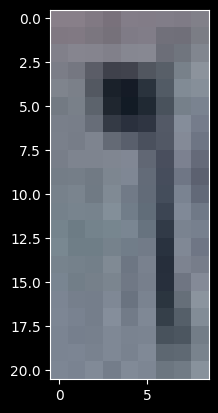

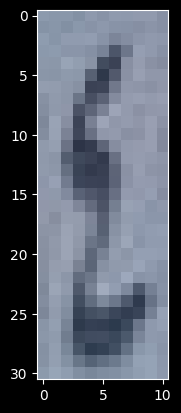

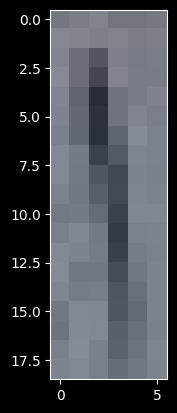

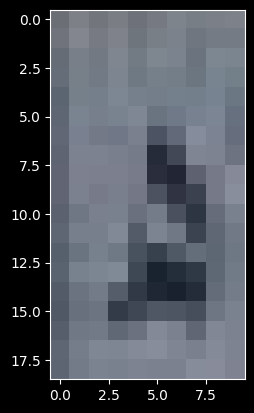

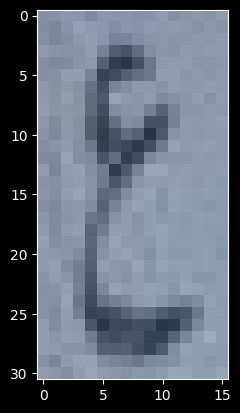

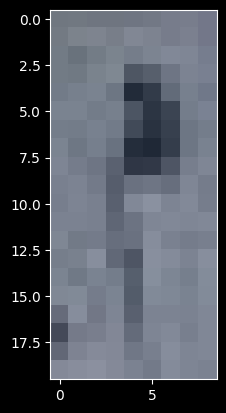

plate  1


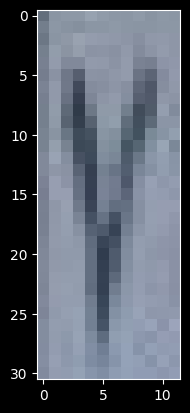

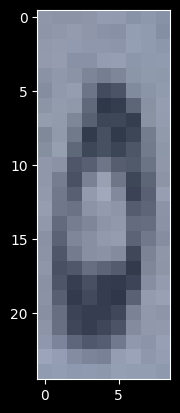

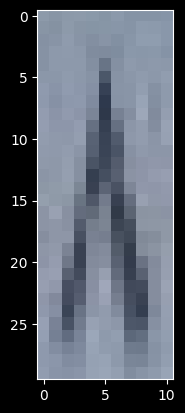

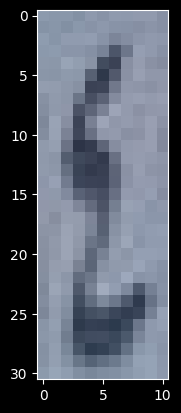

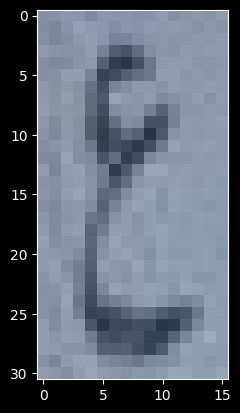

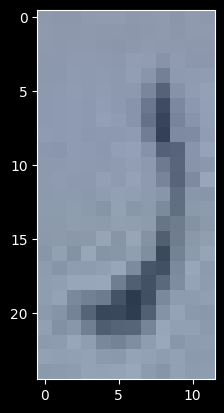

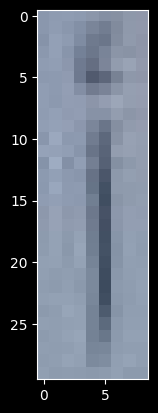

In [27]:
# plot the cars_sorted_path_using_classes
for i in range(len(cars_sorted_path_using_classes)):
    print('plate ',i)
    for j in range(len(cars_sorted_path_using_classes[i])):
        img = cv2.imread(cars_sorted_path_using_classes[i][j])
        pyplot.imshow(img)
        pyplot.show()